# <font color=green>---------------------------------------------------------------------------------------------------------------
# <font color=green>Hi and Welcome to Visulization of Movies Dataset !
### <font color=red> -Aumdevsinh
# <font color=green>---------------------------------------------------------------------------------------------------------------
### __[Visit my Website](http://aumzala19.wixsite.com/website-1)__            __[LinkedIn Profile](http://linkedin.com/in/aum)__
### <font color=blue>We have Movies dataset consisting of attributes: 
### <font color=blue>1. Film Name 2. Genre 3. Rotten Tomatoes Rattings(by critics) 4. Rating by Audience 5. Budget and 6. Year

## <font color=blue>Contents
### [1. Movies Data Setup](#movies_data_setup)
### [2. Critics vs. Audience](#critics_vs_audience)
### [3. Budget and Genre](#budget_and_genre)
### [4. Critics vs. Audience and Genre](#critics_audience_genre)
### [5. Critics vs. Audience and Budget](#critics_audience_budget)
### [6. Using Facet Grid](#facet_grid)
### [7. Styling Graphs](#styling_graphs)

<a id="movies_data_setup"></a>
# <font color=brown>1. Movies Data Setup

#### <font color=brown>Lets start with importing Pandas Matplotlib and Seaborn and will make the plots inline for matplotlib

In [2]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### <font color=brown>Get the current working directory and place the cvs data file there or you can give the absolute path of the file in read_csv() 

In [3]:
os.getcwd()

'C:\\Users\\Aum\\Desktop\\python\\pyscript.com'

#### <font color=brown>Lets get our data set and store it in variable movies 

In [5]:
movies = pd.read_csv('Movie-Ratings.csv')

#### <font color=brown>So whats the type of movies variable? Lets checkout

In [6]:
type(movies)

pandas.core.frame.DataFrame

#### <font color=brown>How big is the data set we are dealing with ?

In [7]:
len(movies)

559

#### <font color=brown>So how our data looks like? Lets have a look 

In [8]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


#### <font color=brown>The data looks clean and decent but will need to change the column names
#### <font color=brown>as its best not to have spaces in our column names so we rename it

In [9]:
movies.columns = ['Film','Genre','Rt_ratings','People_ratings','Budget','Year']

#### <font color=brown>Its changed now ! 

In [7]:
movies.head()

,Film,Genre,Rt_ratings,People_ratings,Budget,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


#### <font color=brown>The .describe() can be very helpful to have a quick overview of the distribution of our data 

In [10]:
movies.describe()

,Rt_ratings,People_ratings,Budget,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


#### <font color=brown>As we see the numerical aspects of our dataset are shown and thats why we dont see the Film and the Genre description over here and that makes sense too.
#### <font color=brown>Also we can see the two ratings and budget make sense to have standard deviation mean etc but the year although numeric column does not need those.
#### <font color=brown>Thats where knowing the data makes a difference !

# <font color=brown>---------------------------------------------------------------------------------------------------------------

#### <font color=brown>By default the non numeric types here Film and Genre are treated as object

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
Rt_ratings        559 non-null int64
People_ratings    559 non-null int64
Budget            559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


#### <font color=brown>Will treat the Film, Genre and also Year as category type so we can easily use them

In [12]:
movies.Film = movies.Film.astype('category')
movies.Year = movies.Year.astype('category')
movies.Genre = movies.Genre.astype('category')

In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
Rt_ratings        559 non-null int64
People_ratings    559 non-null int64
Budget            559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


#### <font color=brown>To access the values in these categories

In [15]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

#### <font color=brown>Omitted the columns that are now categorical

In [16]:
movies.describe() 

,Rt_ratings,People_ratings,Budget
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


<a id="critics_vs_audience"></a>
## <font color=brown>2. Critics vs. Audience

### <font color=brown>How critics rate vs how audience rate

#### <font color=brown>Lets use a joint plot to see what insights we can get here
#### <font color=brown>Here we can see the ratings given by people are in general more than by critics as we can see the points are more above the diagonal 

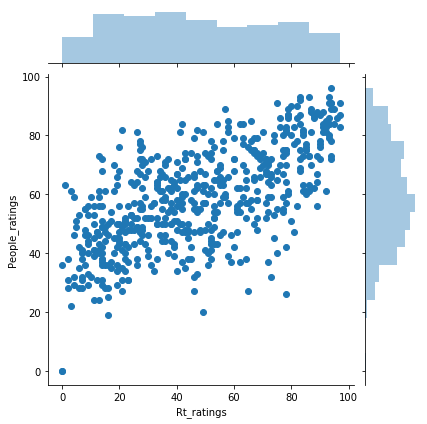

In [306]:
j = sns.jointplot(data=movies, x='Rt_ratings',y='People_ratings')

#### <font color=brown>Can change the kind parameter to get a visually appealing graph

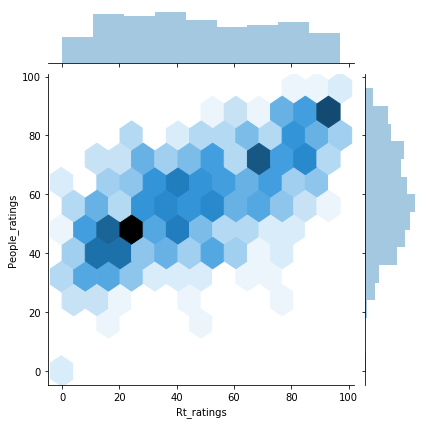

In [31]:
j = sns.jointplot(data=movies, x='Rt_ratings',y='People_ratings', kind='hex')

### <font color=brown>In ratings let's compare the distribution

#### <font color=brown>What can we infer from these two graphs ?

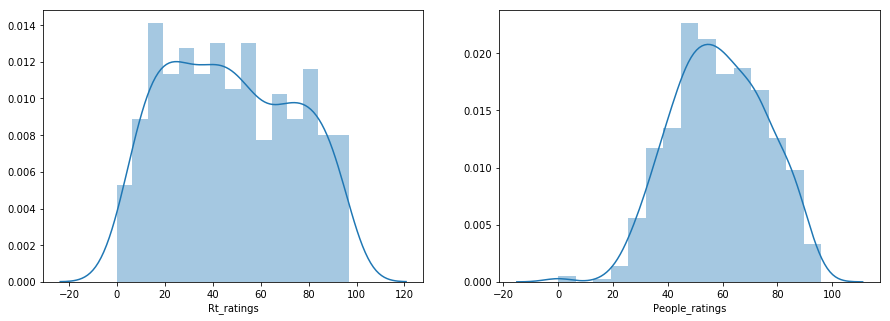

In [46]:
f, axes = plt.subplots(1,2,figsize=(15,5))
h_critics = sns.distplot(movies.Rt_ratings, bins=15,ax=axes[0]) 
h_people = sns.distplot(movies.People_ratings, bins=15, ax=axes[1])

### <font color=brown>The critic ratings are more distributed in the range from 0 to 100 while we see audience ratings are more dense from 40-50 to 70-80 as:
### <font color=brown>1. Audience rate based on relatively few aspects like entertainment and story.
### <font color=brown>2. Critics have a wider scale of evaluation like sound effects, cinematography etc and hence more balanced distribution of ratings.

### <font color=green>* Even easier way of spotting this is overlaying two charts

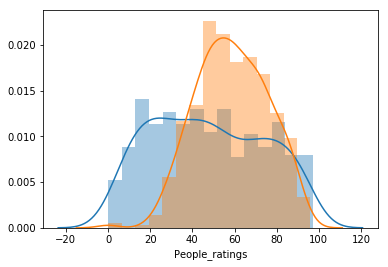

In [315]:
h_critics = sns.distplot(movies.Rt_ratings, bins=15) 
h_people = sns.distplot(movies.People_ratings, bins=15)

## <font color=brown>Selecting the bins 
### <font color=brown>Imagine bins as actual bins in which we can put our data so more bins is more detailed view . 
### <font color=brown>Lets see how bins affect histogram of budget of movies we have on hand
### <font color=brown>*Also we see here the power of python ...when our charts are related we can draw them in just a couple of lines

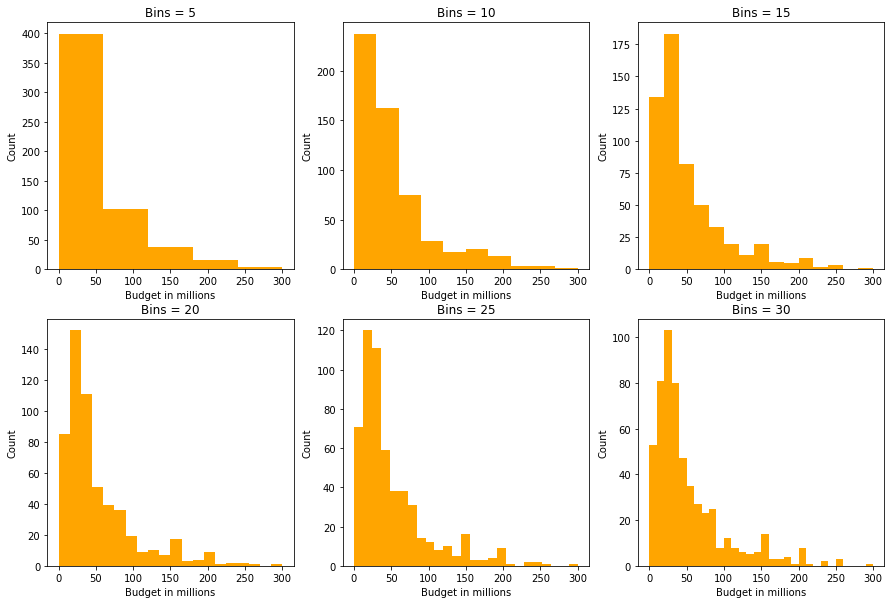

In [318]:
kwargs = dict(x=movies.Budget,color='orange')
f, axes = plt.subplots(2,3,squeeze=True,figsize=(15,10))
i = 0
for ax in axes.flat:
    ax.set(ylabel='Count', xlabel='Budget in millions')
    ax.hist(**kwargs,bins=i+5)
    ax.set_title('Bins = '+str(i+5))
    i += 5
            

<a id="budget_and_genre"></a>
## <font color=brown>3. Budget and Genre
### <font color=brown>Steps:
#### <font color=brown>1. convert the values of genre category to list
#### <font color=brown>2. Use these values to get budget of each category

In [319]:
genres = list(movies.Genre.cat.categories) 
list_genre = list()
for g in genres:
    list_genre.append( movies[movies.Genre == g].Budget)

## <font color=brown>We plot histograms and we can see the distribution 

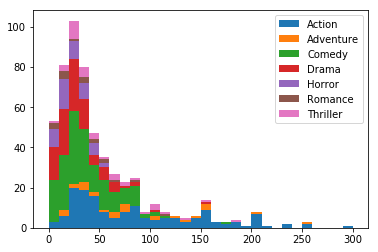

In [320]:
plt.hist(list_genre,bins=30,stacked=True,rwidth=1, label=genres)
plt.legend()
plt.show()

## <font color=brown>The box plots and the violin plots can help compare the budget distribution
### <font color=brown>The box plots are best in helping see the outliers as compared to violin which show better the density 
#### <font color=brown>Here we can see that Drama and the horror are the least expensive Genre to make a movie
#### <font color=brown>Action movies are costliest to make in general and have more distributed budgets
#### <font color=brown>In the violin plot we can see Horror movies have very high density and if we might try some ML algorithm chances are we achive higher accuracy in predicting the budget of those

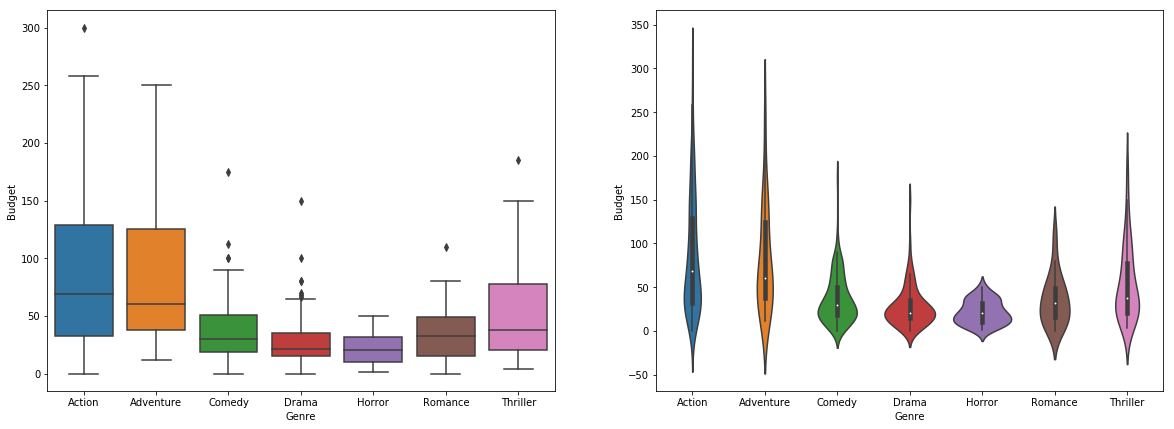

In [193]:
f, axes = plt.subplots(1,2,figsize=(20,7)) 
budget_compare1 = sns.boxplot(data=movies, x='Genre', y='Budget',ax=axes[0])
budget_compare2 = sns.violinplot(data=movies, x='Genre', y='Budget',ax=axes[1])

<a id="critics_audience_genre"></a>
## <font color=brown>4. Critics vs. Audience and Genre

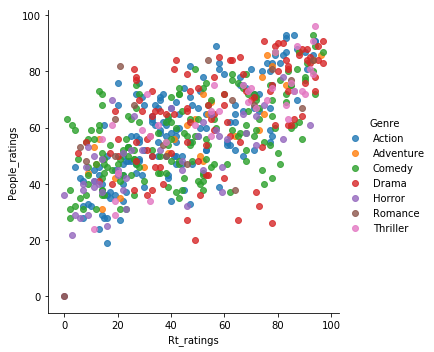

In [26]:
vis1 = sns.lmplot(data=movies, x='Rt_ratings', y='People_ratings',\
                 fit_reg = False, hue='Genre',size=5,aspect=1)

### <font color=brown>Kernel Density Estimation plot for peoples rating and critics rating with shading

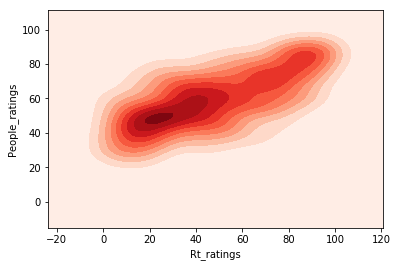

In [195]:
kde_ratings  = sns.kdeplot(movies.Rt_ratings,movies.People_ratings,cmap='Reds',shade=True)

<a id="critics_audience_budget"></a>
# <font color=brown>5. Critics vs. Audience and Budget

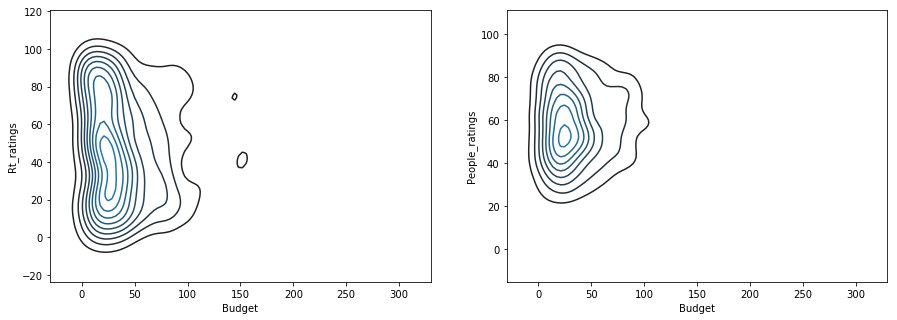

In [208]:
f, axes = plt.subplots(1,2,figsize=(15,5))
kde_crticts = sns.kdeplot(movies.Budget,movies.Rt_ratings, ax=axes[0])
kde_audience = sns.kdeplot(movies.Budget,movies.People_ratings,ax=axes[1])

### <font color=brown>Comparision of various graphs that can be used for visualizing th impact of budget on movie ratings

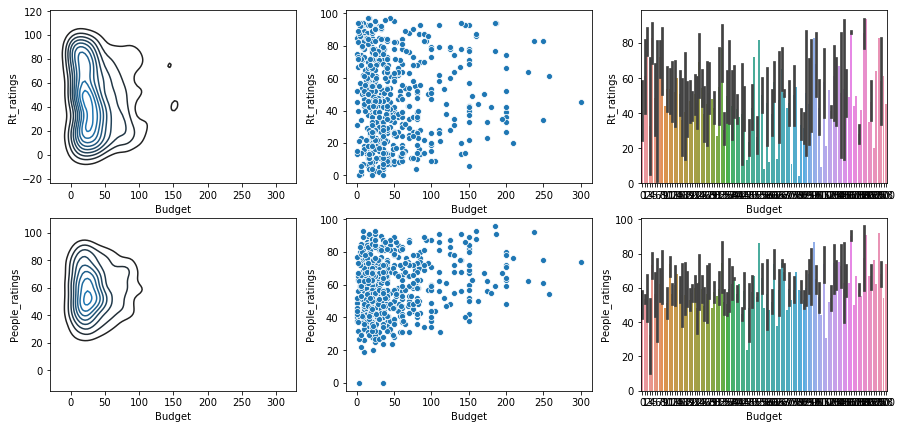

In [291]:
f, axes = plt.subplots(2,3,figsize=(15,7))
g1 = sns.kdeplot(movies.Budget,movies.Rt_ratings, ax=axes[0][0])
g2 = sns.kdeplot(movies.Budget,movies.People_ratings, ax=axes[1][0])
g3 = sns.scatterplot(movies.Budget,movies.Rt_ratings, ax=axes[0][1])
g4 = sns.scatterplot(movies.Budget,movies.People_ratings, ax=axes[1][1])
g5 = sns.barplot(movies.Budget,movies.Rt_ratings,ax=axes[0][2])
g6 = sns.barplot(movies.Budget,movies.People_ratings,ax=axes[1][2])

## <font color=brown>Ratings and Genre 
### <font color=brown>From the first glance we can say Thrillers are overall better performers while Horror movies havent performed so well overall, specially in People's rating. 

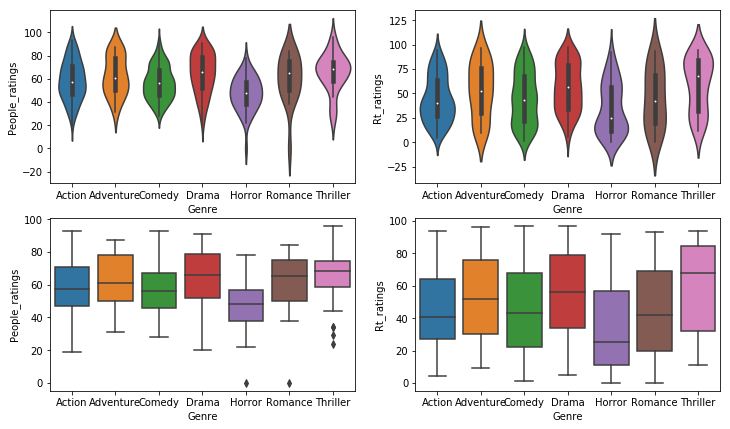

In [299]:
f, axes = plt.subplots(2,2,figsize=(12,7))
violin1 = sns.violinplot(data=movies, x='Genre', y='People_ratings', ax=axes[0][0])
violin2 = sns.violinplot(data=movies, x='Genre', y='Rt_ratings', ax=axes[0][1])
box1 = sns.boxplot(x=movies.Genre,y=movies.People_ratings, ax=axes[1][0])
box1 = sns.boxplot(x=movies.Genre,y=movies.Rt_ratings, ax=axes[1][1])

<a id="facet_grid"></a>
# <font color=brown>---------------------------------------------------------------------------------------------------------------
# <font color=brown>6. Using Facet Grid

# <font color=brown>---------------------------------------------------------------------------------------------------------------
## <font color=brown>1.Critc Rating vs Budget over Years and also Genre

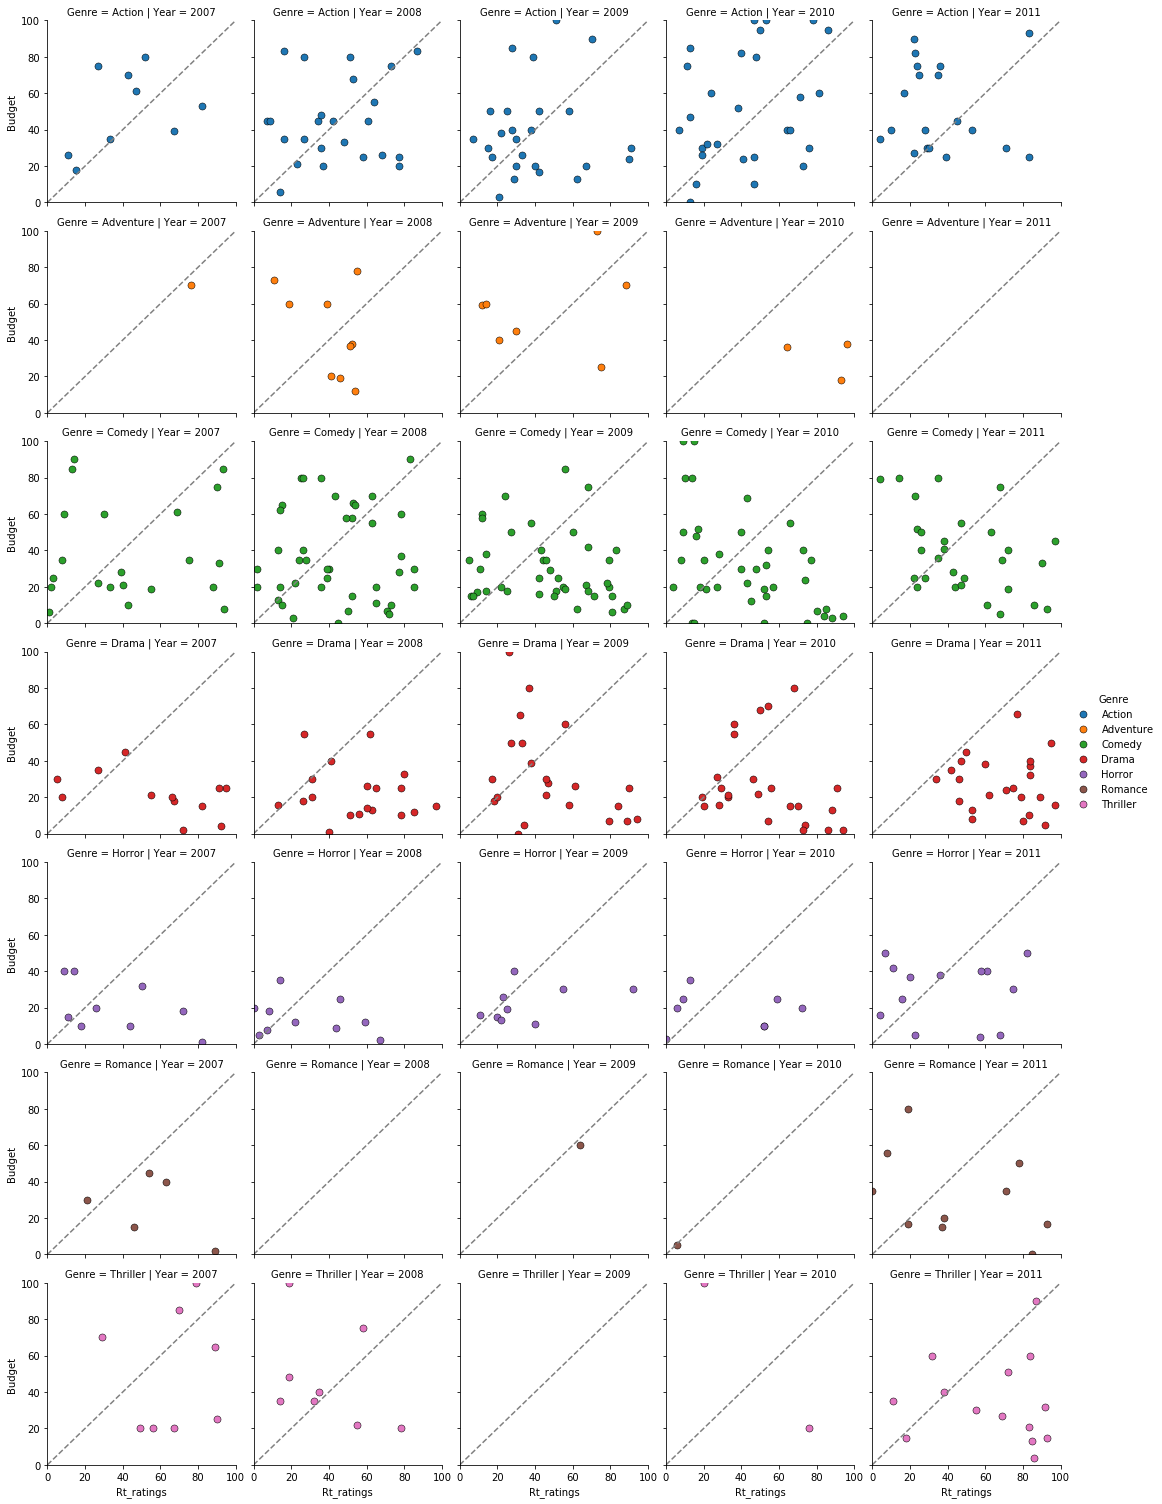

In [302]:
#Controlling axes and setting diagonals
g = sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter,'Rt_ratings','Budget',**kws)
g.set(xlim=(0,100), ylim=(0,100)) #setting coordinates
for ax in g.axes.flat:
    ax.plot((0,100),(0,100),c='gray',ls='--')
g.add_legend()

# <font color=brown>--------------------------------------------------------------------------------------------------------------
## <font color=brown>2.People's Rating vs Budget over Years and also Genre

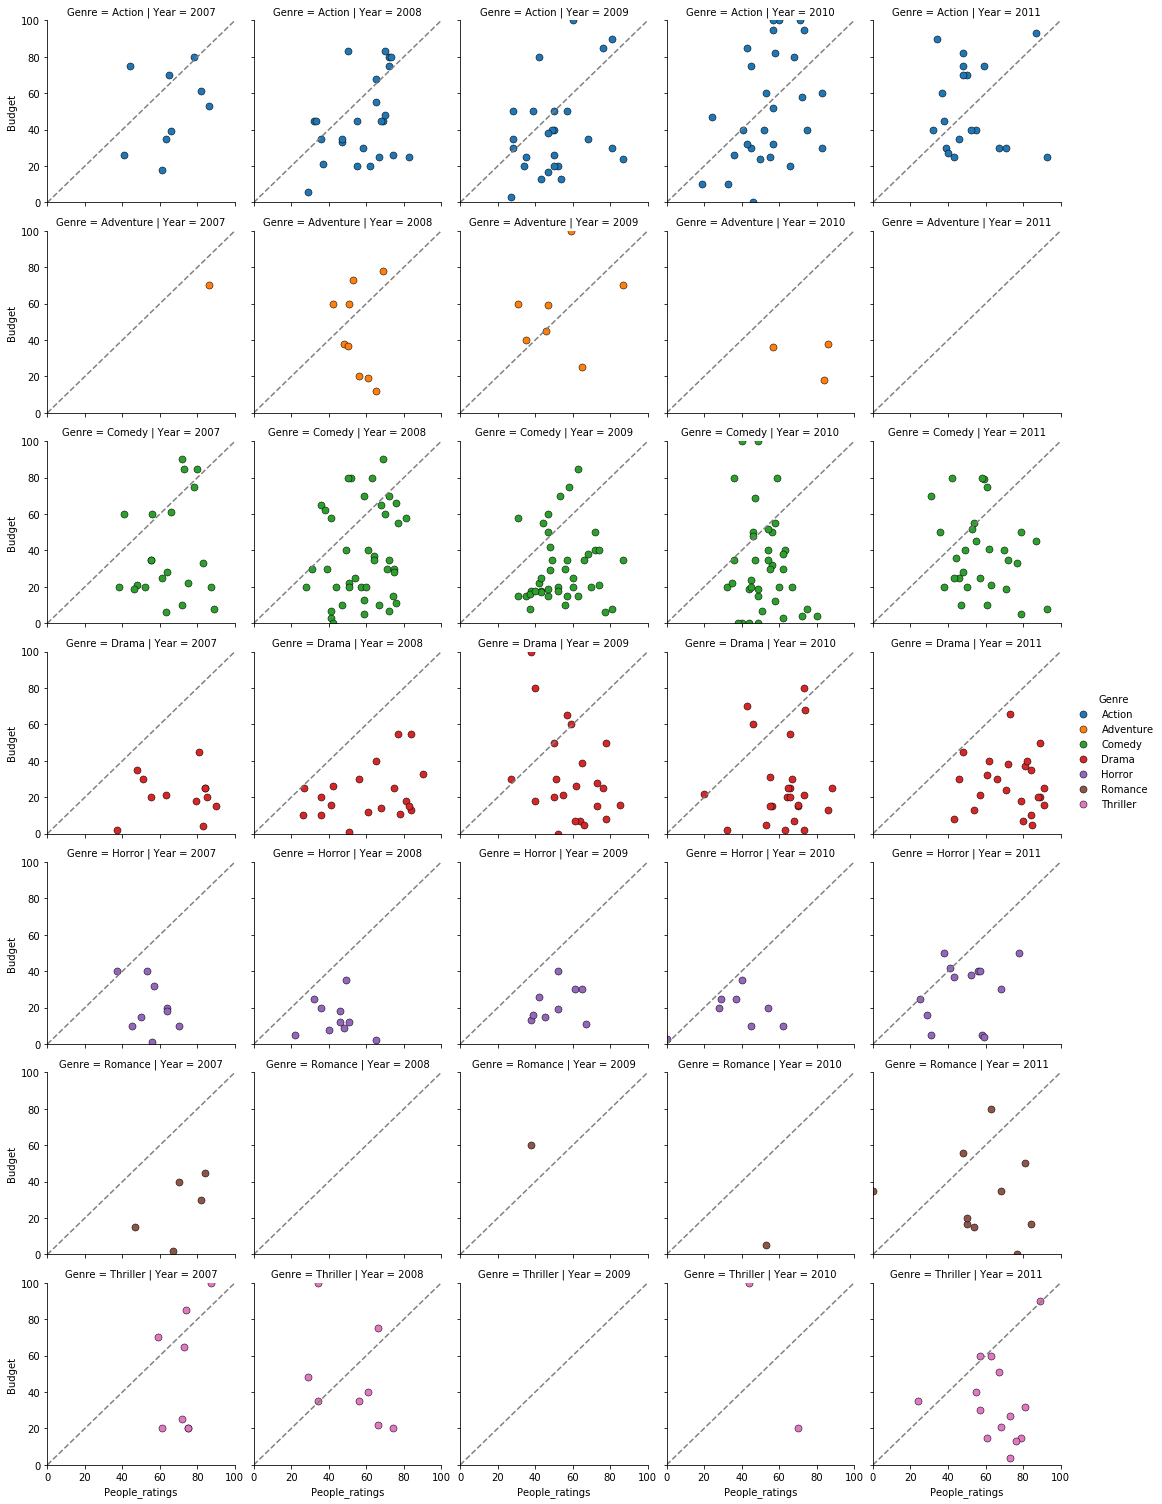

In [303]:
g = sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter,'People_ratings','Budget',**kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100),c='gray',ls='--')
g.add_legend()

# <font color=brown>---------------------------------------------------------------------------------------------------------------
## <font color=brown>3.People's Rating vs Budget over Years and also Genre

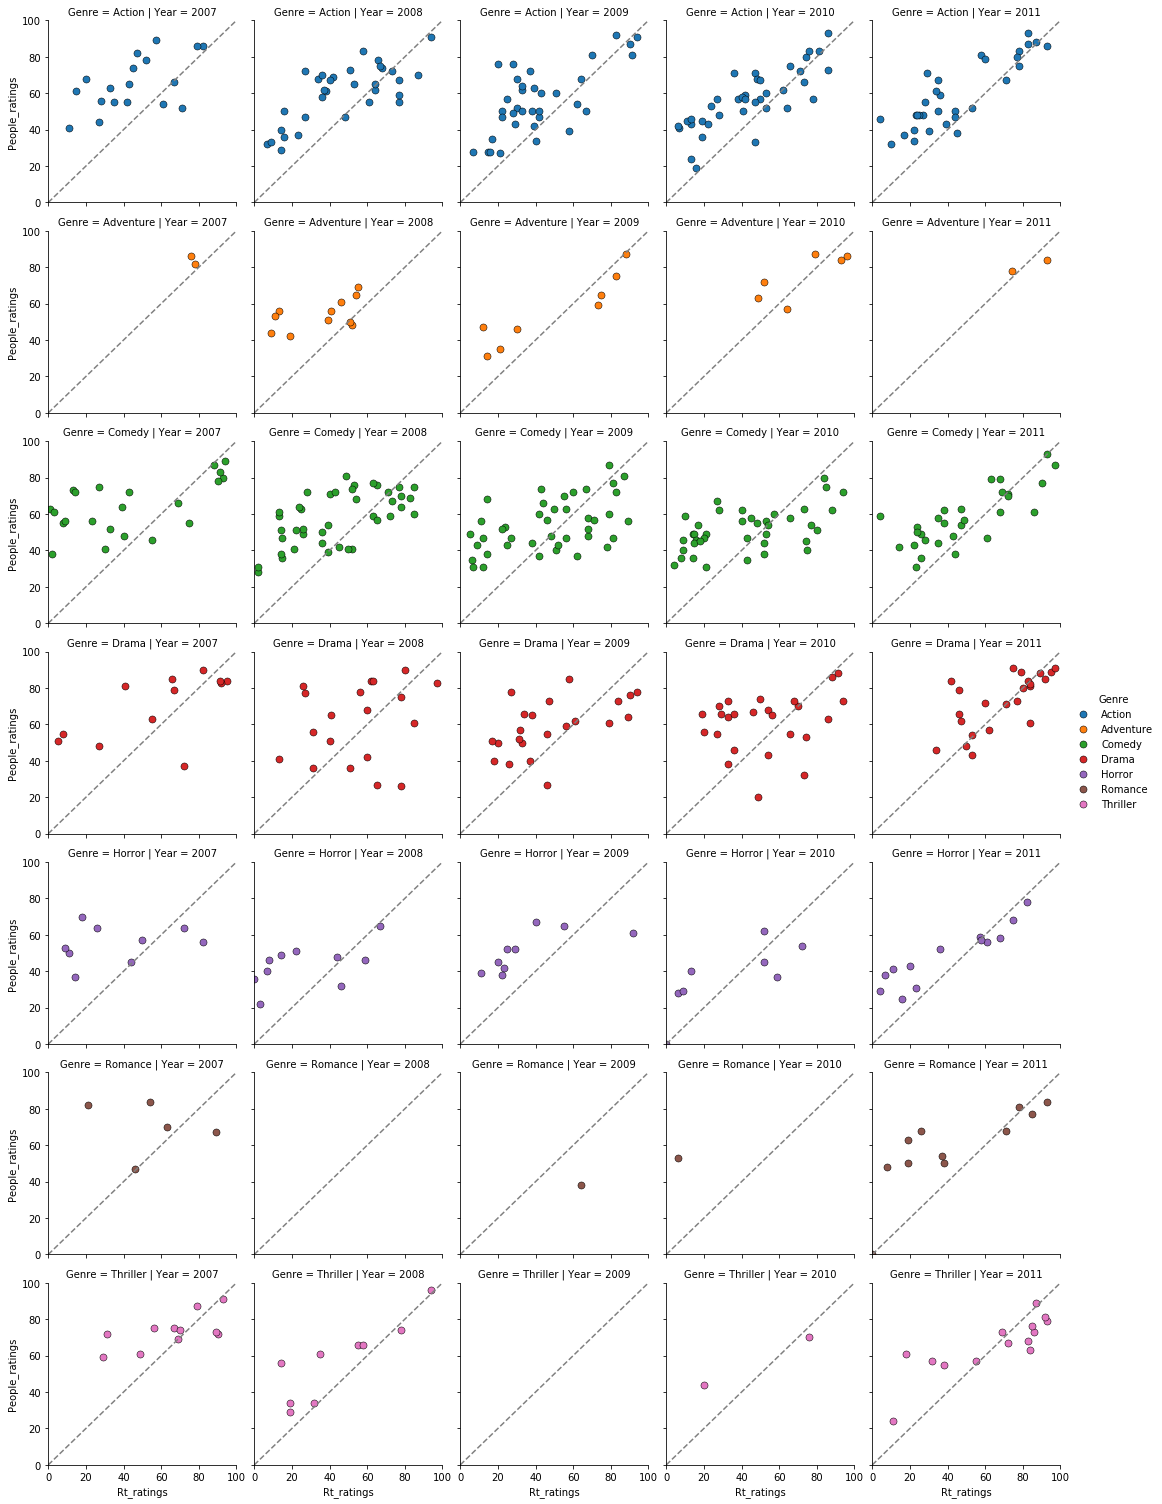

In [305]:
g = sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter,'Rt_ratings','People_ratings',**kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100),c='gray',ls='--')
g.add_legend()

<a id="styling_graphs"></a>
# <font color=brown>7. Styling graphs
## <font color=brown>Specially to highlight 

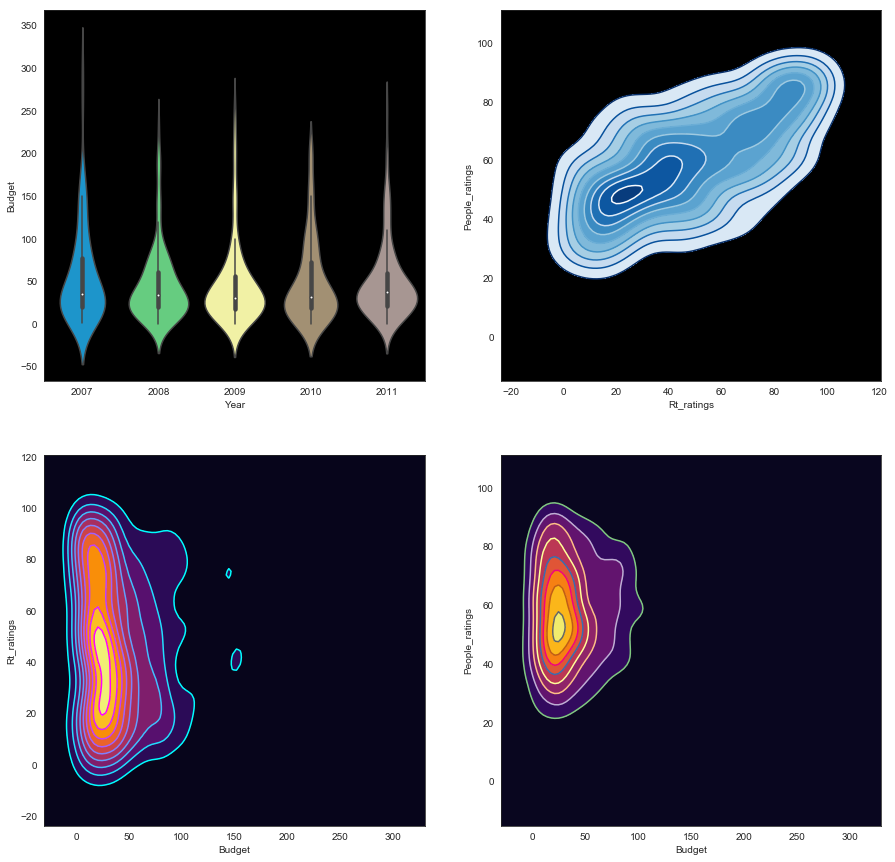

In [43]:
sns.set_style('white',{'axes.facecolor':'black'})
f,axes = plt.subplots(2, 2, figsize=(15,15))
d1 = sns.violinplot(data=movies, x='Year', y='Budget',palette='terrain', ax = axes[0,0])
d2  = sns.kdeplot(movies.Rt_ratings,movies.People_ratings,cmap='Blues',shade=True,shade_lowest=False,ax=axes[0,1])
d21 = sns.kdeplot(movies.Rt_ratings,movies.People_ratings,cmap='Blues_r',ax=axes[0,1] )
d3 = sns.kdeplot(movies.Budget,movies.Rt_ratings,cmap='inferno',shade=True,ax=axes[1,0])
d31  = sns.kdeplot(movies.Budget,movies.Rt_ratings,cmap='cool',ax=axes[1,0])
d4 = sns.kdeplot(movies.Budget,movies.People_ratings,cmap='inferno',shade=True,ax=axes[1,1])
d41 = sns.kdeplot(movies.Budget,movies.People_ratings,cmap='Accent',ax=axes[1,1])

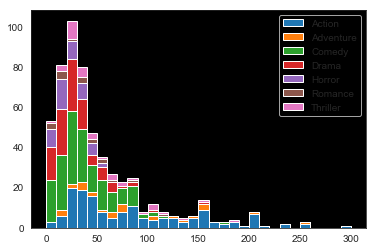

In [44]:
plt.hist(list_genre,bins=30,stacked=True,rwidth=1, label=genres)
plt.legend()
plt.show()

## <font color=green>Thanks !!
### <font color=red> __[Visit my Website](http://aumzala19.wixsite.com/website-1)__
### <font color=blue>__[LinkedIn Profile](http://linkedin.com/in/aum)__